**Defining the Question.**

The task requires us to implement a K-nearest neighbor (kNN) classifier and a Naive Bayes classifier.

**a) Specifying the Question**

Build a model that determines whether or not the passenger survived or not.

**b) Defining the Metric for Success**

Load and Analyze data.

Normalize data as it has different units.

Create KNN model classifier

Create random forest classifier model to depict accuracy.

Challenge the model with other models and check accuracy change.

**c) Understanding the context**

Use KNN and Naives Bayes classifier to:


Build a model that determines whether or not Build a model that determines whether or not the passenger survived or not.

**Detect spam in spambase dataset**


**d) Recording the Experimental Design**

(CRISP- DM) methodology

Get the data

understand the data

Clean the data

Explore the data

Create models

Challenge model

Evaluate model perfomance

In [164]:
#Import pandas libraries
import pandas as pd

#Import numpy libraries
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import sklearn libraries

from sklearn import metrics
#  import classifier libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  classification_report


In [165]:
#load the train dataset
train = pd.read_csv('/content/train (5).csv')


In [166]:
#previewing the first five rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [167]:
# checking for the shape
train.shape

(891, 12)

The train dataset has 891 rows and 12 columns


In [168]:
# load the test dataset
testdata = pd.read_csv('/content/test (1).csv')


In [169]:
#viewing the first five rows
testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [170]:
#shape
testdata.shape

(418, 11)

The dataset has got 418 rows and 11 columns


  **Train Dataset**

Data Exploration

In [171]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [172]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



 We will drop the PassengerID ,Cabin,Fare,Ticket columns as they don't have any use to the goal from the titanic dataset

In [173]:

train = train.drop(['Ticket'], axis = 1)
train = train.drop(['PassengerId'], axis = 1)
train = train.drop(['Name'], axis = 1)
train = train.drop(['Fare'], axis = 1)
train = train.drop(['Cabin'], axis = 1)


#Confirm they have been dropped.
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

**Data Cleaning**

In [174]:
# Missing values
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

Replacing the missing values in age and embarked columns

In [175]:

#Replace with the mode
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace = True)

print(train['Embarked'].mode())


0    S
dtype: object


In [176]:
#Replace age with the median
train['Age'].fillna(train['Age'].median(),inplace = True)

In [177]:
#Confirm that the missing values have been removed
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [178]:
#change non-numerical value to numerical values
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1}).astype(int)
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)


Note

Female = 0
Male = 1
S = 0
C = 1
Q = 2

In [ ]:
#Confirm they have been converted.
train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Embarked      int64
dtype: object

In [ ]:
train['Family'] = train['SibSp'] + train['Parch'] + 1


In [ ]:

#Drop the SibSp and Parch column
train = train.drop(('SibSp'),axis = 1)
train = train.drop(('Parch'),axis = 1)

In [ ]:
train

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,1,22.0,0,2
1,1,1,0,38.0,1,2
2,1,3,0,26.0,0,1
3,1,1,0,35.0,0,2
4,0,3,1,35.0,0,1
...,...,...,...,...,...,...
886,0,2,1,27.0,0,1
887,1,1,0,19.0,0,1
888,0,3,0,28.0,0,4
889,1,1,1,26.0,1,1


**EDA ANALYSIS**

**UNIVARIATE ANALYSIS** 

Text(0.5, 1.0, 'Distribution of survivors according to Pclass')

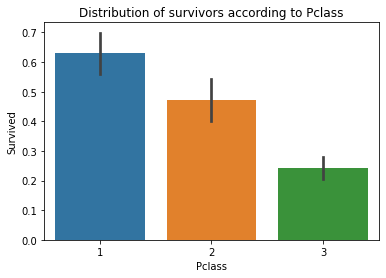

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Distribution of survivors according to Pclass')

**Histogram**

Text(0.5, 1.0, 'Distribution of people who survived or not')

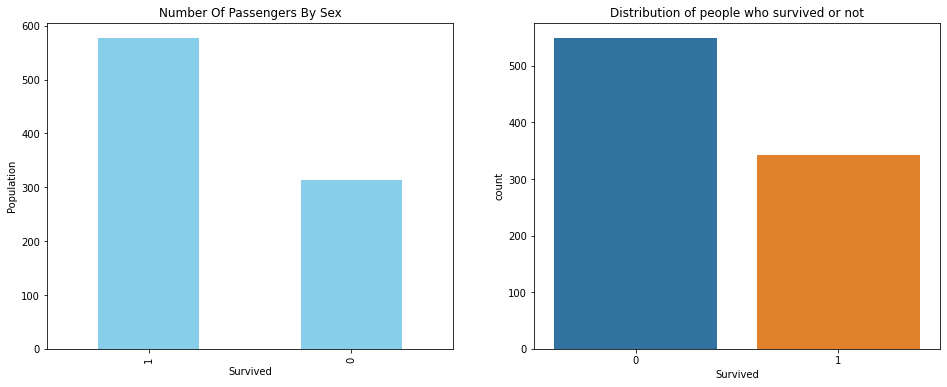

In [ ]:
#Checking for  the number of passengers by sex and their survival rate.
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
train["Sex"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Sex")
ax[0].set_ylabel("Population")
ax[0].set_xlabel('Survived')
sns.countplot("Survived", data = train)
plt.title('Distribution of people who survived or not')

Most passengers didnt survive the titanic and majority of the passengers were male

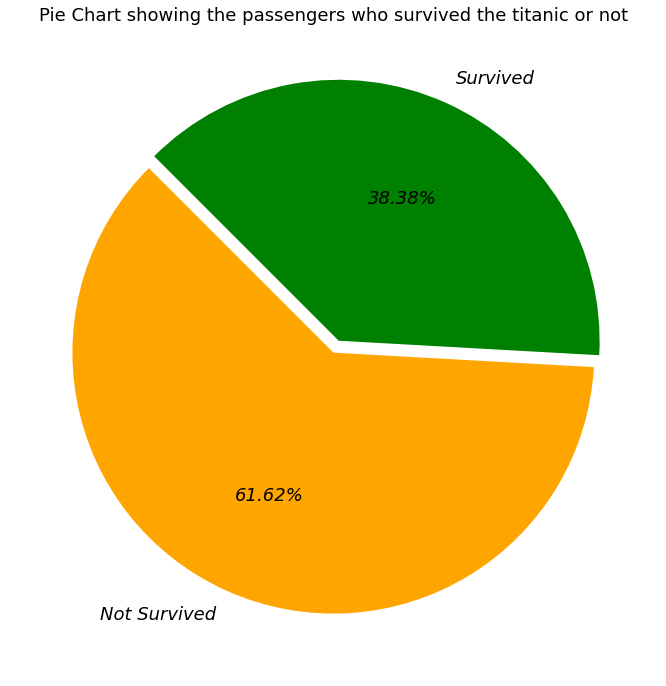

In [ ]:
survive = train.groupby(['Survived'])['Survived'].count()
survive
plt.figure(figsize = (16, 12))
explode = (0,0.05)
labels = (['Not Survived' , 'Survived'])
colors = ['Orange','green']
plt.pie(survive.values, labels = labels, explode = explode, autopct = '%1.2f%%', colors = colors, startangle = 135, textprops = {'color':'black', 'style': 'oblique', 'size':18})
plt.title('Pie Chart showing the passengers who survived the titanic or not', fontsize = 18)
plt.show()

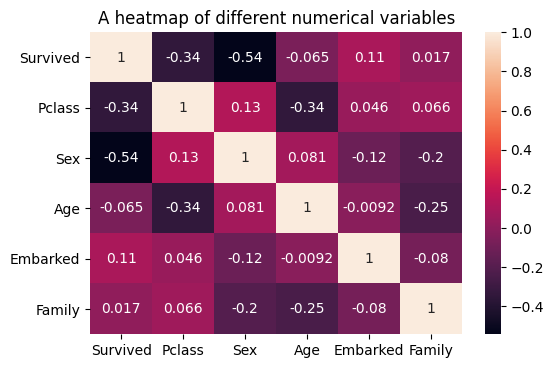

In [ ]:
#  checking for correlation of numerical variables

plt.figure(dpi=100)

sns.heatmap(train.corr(),annot=True)
plt.title('A heatmap of different numerical variables')

plt.show()


In [110]:
#People less than 18yrs
print ("Passengers who are less than 18years are : ",str(len(train[train["Age"] < 18 ])))

Passengers who are less than 18years are :  113


In [111]:
#People who  are children
print ("Passengers who were children are : ",str(len(train[train["Age"] < 13])))

Passengers who were children are :  69


In [112]:
#Check how many adults, teenagers and children were in the titanic ship

print ("Passengers who are adults are : ",str(len(train[train["Age"] >= 18])))

Passengers who are adults are :  778


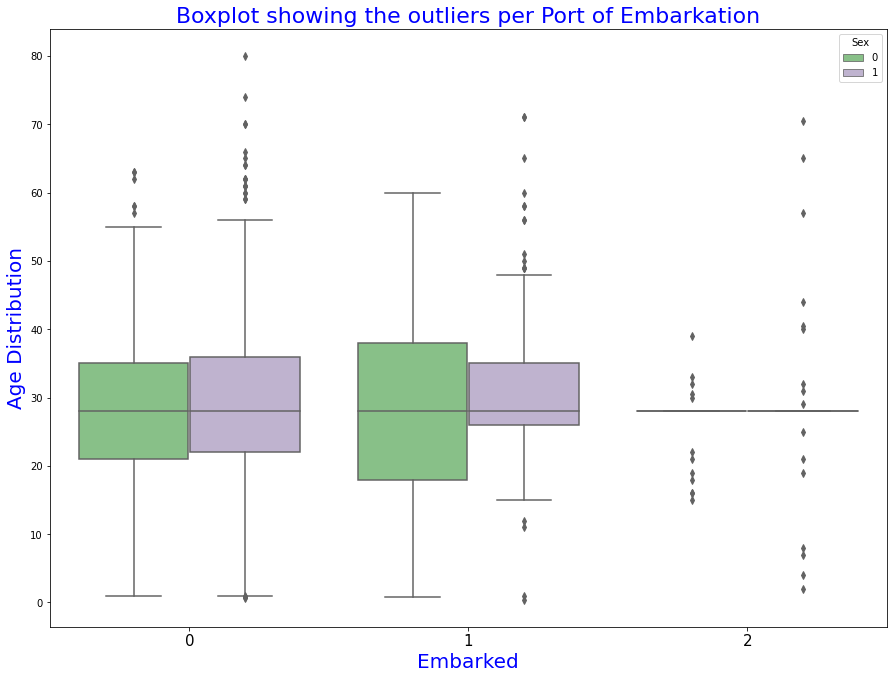

In [113]:
plt.figure(figsize = (15,11))
sns.boxplot(train['Embarked'],train['Age'] , hue = train['Sex'], palette = 'Accent')
plt.ylabel('Age Distribution', fontsize = 20, color = 'blue')
plt.xticks(fontsize = 15)
plt.xlabel('Embarked',fontsize = 20, color = 'blue')
plt.title('Boxplot showing the outliers per Port of Embarkation', fontsize = 22, color = 'blue')
plt.show()


Few passengers Embarked the ship at Port Q compared to both C and S.

The was alot of old passengers who embarked the ship at port S compared to C and Q

Port Q saw many young males embark the ship compared to S and Q.

At port S and Q more male embarked the ship than female while at port C more female embarked the ship than male.


**Factor Plot**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


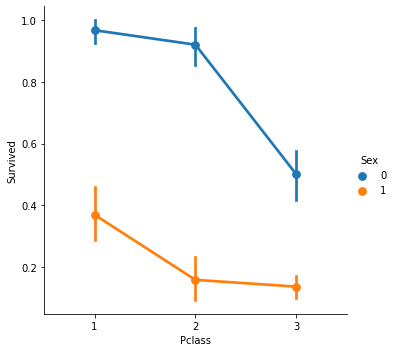

In [114]:
sns.factorplot("Pclass", "Survived", hue = "Sex", data = train)
plt.show()

**Bivariate Analysis**

**Data Preprocessing**

In [116]:
X = train.drop(['Survived'], axis=1)
X
y = train['Survived']

we split the dataset into two parts i.e 80 - 20 sets.

In [117]:

#Split our dataset train dataset size is 80% test datset is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape, X_test.shape)

(712, 5) (179, 5)


In [118]:
print(X_train.head(4))

     Pclass  Sex   Age  Embarked  Family
140       3    0  28.0         1       3
439       2    1  31.0         0       1
817       2    1  31.0         1       3
378       3    1  20.0         1       1


In [119]:
#Confirm there is no nan in train dataset.
np.any(np.isnan(X_train))

False

In [120]:
# Confirm there is no nan in  test dataset
np.any(np.isnan(X_test))

False

**Feature Scaling**



We need to normalize our independent variables. We use robust scaler to do this

In [121]:
#Use robust scaler to normalize our dataset
cols = X_train.columns


scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

**Perfoming KNN - Baseline Model**

we will use k = 5,this is the constant k classifiers used

In [122]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 5)

# fitting model
knn.fit(X_train, y_train)

#Predicting the model
y_pred = knn.predict(X_test)  

#Checking accuracy score
print('Accuracy score of KNN model is: ' ,metrics.accuracy_score(y_test, y_pred))

Accuracy score of KNN model is:  0.7932960893854749


In [123]:
#Compute the confusion matrix to understand the actual versus predicted variables.
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[94, 16],
       [21, 48]])

**Findings**

with K= 5 ,accuracy model predicted 79% accuracy.

We can optimize this by changing the K to see if the model perfomance will change.

**Challenging the solution**

In [124]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 4)

# fitting model
knn.fit(X_train, y_train)

#Predicting the model
y_pred = knn.predict(X_test)  

print('Accuracy score of KNN model is: ' ,metrics.accuracy_score(y_test, y_pred))

Accuracy score of KNN model is:  0.8156424581005587


In [125]:
#Compute the confusion matrix
print(confusion_matrix(y_test,y_pred))

print('********************************************************')

#Check the accuracy score of the gradient model
print(classification_report(y_test,y_pred))

[[101   9]
 [ 24  45]]
********************************************************
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.83      0.65      0.73        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



**Findings**

Using K= 4 , our accuracy score increased to 81% accuracy.
We can still use other models to see if they will improve our accuracy score and have a better model

**Random Forest Classifier**

In [126]:
# Run the classifier with n_estimators = 100

rf1 = RandomForestClassifier(n_estimators=100, random_state=0,max_depth=5, min_samples_split = 20)

# fit the model to the training set
rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [127]:
# Predict on the test set results
y_pred1 = rf1.predict(X_test)

In [128]:
print('Accuracy score of random forest classifier model is: ' ,metrics.accuracy_score(y_test, y_pred1))

Accuracy score of random forest classifier model is:  0.8268156424581006


In [129]:
# Calculate a confusion matrix to identify what patients were predicted to be negative or have hypothyroid
print(confusion_matrix(y_test,y_pred1))

print('************')

#Check the accuracy score of the gradient model
print(classification_report(y_test,y_pred1))

[[101   9]
 [ 22  47]]
************
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       110
           1       0.84      0.68      0.75        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



The model accuracy increased to 82%  after using random forest classifier.
The model predicted 101 passengers who didn't survive and 47 who did survive

However, we can still improve on the model using gradient boosting and see how it will perfom.

**Gradient Boosting Classifier**

In [130]:
#Intiate the gradient boosting classifier
gradient = GradientBoostingClassifier(learning_rate =0.1,n_estimators=100,max_depth=3,min_samples_split=2) # defining my classifier as  gradient

#fit the train dataset in the classifier
gradient.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [131]:
#Making a prediction
y_pred_g = gradient.predict(X_test)
y_pred_g

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [132]:
# Calculate a confusion matrix to identify what patients were predicted to be negative or have hypothyroid
confusion = confusion_matrix(y_test,y_pred_g)
print(confusion)

print('*********')

#Check the accuracy score of the gradient model
print(classification_report(y_test,y_pred_g))

[[103   7]
 [ 23  46]]
*********
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       110
           1       0.87      0.67      0.75        69

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.84      0.83      0.83       179



The model accuracy increased to 84% predicting the passenger who did not survive as 103 and those wo survived as 46.

**PART 2**

**Objectives:**
Determine whether or not a message is spam.

**Metrics of success:**

Record the various accuracy levels under Naives Bayes classifiers

**Naive Bayes Classifier**

Naive Bayes is a supervised classification technique based on Bayes' 

Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

For this classification, we will use the spam base dataset

In [133]:
# Importing our libraries

import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [135]:
spam = pd.read_csv('/content/spambase.data', header = None)

In [136]:
spam.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [137]:
#Determining the shape
spam.shape

(4601, 58)

The dataset had 4601 rows and 58 columns

In [138]:
#Check if there are missing values
spam.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64

In [139]:
#Grouping X and Y

X = spam.iloc[:,:48]
y= spam.iloc[:,-1]

In [140]:

#  Bernoulli Naive Bayes Classifier
# Creating our Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB()

# Train model
model = clf.fit(X, y)

# model score
model.score(X, y)

0.877852640730276

In [141]:
model = MultinomialNB().fit(X, y)

In [142]:
## Fitting the model

#Creating a list of classifiers to use
classifier = [BernoulliNB(),MultinomialNB()]

for k, l in zip(classifier, ['berneoullib', 'multinomial']):
  
# Training the dataset  
  X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 0)
  

# Use minmax scaler to scale the data since our dataset has different units 
  sc = MinMaxScaler()

# Fit the data into the model
  X_train= sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  model = k.fit(X_train,y_train)

  y_pred = model.predict(X_test)

  accuracy =  np.mean(y_pred == y_test)
  
  print(l + ' accuracy score is: ' + str(accuracy))

berneoullib accuracy score is: 0.8690928843020098
multinomial accuracy score is: 0.8690928843020098


**Findings**

Using BernoulliNB Naive Bayes classifier and MultinomialNB, they both gave almost the same accuracy of 86% of the model.

In [ ]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1054   43]
 [ 198  546]]


Findings

The 1054 were correctly predicted to have survived and 43 falsely predicted.

198 were accurately predicted to have died and 546 falsely predicted

**Further questions**

For families that had the same ticket number but different passenger ID, how did the KNN algorithm classify them?


**Challenges**


Despite using different classification models, differences between the model accuracy was very minimal.

It was a challenge picking the best model for prediction since they all had almost the same accuracy score.


**Future prospects**

Dataset should be added more feautures to increase the prediction accuracy of our models.